## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Datas

In [3]:
dim_date=pd.read_csv("dim_date.csv")
dim_hotels=pd.read_csv("dim_hotels.csv")
dim_rooms=pd.read_csv("dim_rooms.csv")
fact_aggregate=pd.read_csv("fact_aggregated_bookings.csv")
fact_bookings=pd.read_csv("fact_bookings.csv")

In [4]:
dim_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [5]:
dim_date['week no'].unique()

array(['W 19', 'W 20', 'W 21', 'W 22', 'W 23', 'W 24', 'W 25', 'W 26',
       'W 27', 'W 28', 'W 29', 'W 30', 'W 31', 'W 32'], dtype=object)

In [6]:
dim_date=dim_date[dim_date['week no']!='W 32']
dim_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
86,26-Jul-22,Jul 22,W 31,weekeday
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday


In [7]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      91 non-null     object
 1   mmm yy    91 non-null     object
 2   week no   91 non-null     object
 3   day_type  91 non-null     object
dtypes: object(4)
memory usage: 3.6+ KB


In [8]:
dim_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [9]:
dim_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [10]:
fact_aggregate.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [11]:
fact_aggregate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [12]:

fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [13]:

fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [14]:

fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [15]:

fact_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

## Data Type Change & Data Cleaning

In [16]:
dim_date['date']=pd.to_datetime(dim_date['date'])
fact_aggregate['check_in_date']=pd.to_datetime(fact_aggregate['check_in_date'])
fact_bookings['booking_date']=pd.to_datetime(fact_bookings['booking_date'])
fact_bookings['check_in_date']=pd.to_datetime(fact_bookings['check_in_date'],format='mixed')
fact_bookings['checkout_date']=pd.to_datetime(fact_bookings['checkout_date'],format="mixed")

C:\Users\HP\AppData\Local\Temp\ipykernel_23860\1747195759.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dim_date['date']=pd.to_datetime(dim_date['date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_23860\1747195759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dim_date['date']=pd.to_datetime(dim_date['date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_23860\1747195759.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fact_aggregate['check_in_date']=pd.to_datetime

In [17]:
fact_aggregate['capacity'] = fact_aggregate['capacity'].fillna(fact_aggregate['capacity'].median()).astype(int)

In [18]:
fact_bookings['no_guests'] = fact_bookings['no_guests'].fillna(fact_bookings['no_guests'].median()).astype(int)

In [19]:

fact_bookings['ratings_given']=fact_bookings['ratings_given'].fillna(0)

In [20]:

fact_bookings.isna().sum()

booking_id           0
property_id          0
booking_date         0
check_in_date        0
checkout_date        0
no_guests            0
room_category        0
booking_platform     0
ratings_given        0
booking_status       0
revenue_generated    0
revenue_realized     0
dtype: int64

## Revenue Analysis

In [21]:
revenue_df=pd.merge(dim_hotels,fact_bookings,how='left',on='property_id')
revenue_df.head()

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT11,2022-04-27,2022-01-05,2022-02-05,-3,RT1,direct online,1.0,Checked Out,10010,10010
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,2022-04-30,2022-01-05,2022-02-05,2,RT1,others,0.0,Cancelled,9100,3640
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT13,2022-04-28,2022-01-05,2022-04-05,2,RT1,logtrip,5.0,Checked Out,9100000,9100
3,16558,Atliq Grands,Luxury,Delhi,May012216558RT14,2022-04-28,2022-01-05,2022-02-05,-2,RT1,others,0.0,Cancelled,9100,3640
4,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,2022-04-27,2022-01-05,2022-02-05,4,RT1,direct online,5.0,Checked Out,10920,10920


In [22]:
# Hotelwise Revenue
hotel_revenue=revenue_df.groupby(['property_name','city']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'Revenue in Millions'})
hotel_revenue.reset_index(inplace=True)
hotel_revenue['Revenue in Millions']=hotel_revenue['Revenue in Millions']/1000000
hotel_revenue['Revenue in Millions']=hotel_revenue['Revenue in Millions'].round(2)
hotel_revenue

,property_name,city,Revenue in Millions
0,Atliq Bay,Bangalore,82.44
1,Atliq Bay,Delhi,56.44
2,Atliq Bay,Hyderabad,69.26
3,Atliq Bay,Mumbai,51.91
4,Atliq Blu,Bangalore,72.96
5,Atliq Blu,Delhi,57.93
6,Atliq Blu,Hyderabad,56.04
7,Atliq Blu,Mumbai,73.92
8,Atliq City,Bangalore,81.88
9,Atliq City,Delhi,54.93


In [23]:
revenue_pivot=hotel_revenue.pivot(index='city',columns='property_name',values='Revenue in Millions')
revenue_pivot

property_name,Atliq Bay,Atliq Blu,Atliq City,Atliq Exotica,Atliq Grands,Atliq Palace,Atliq Seasons
city,,,,,,,
Bangalore,82.44,72.96,81.88,60.02,54.49,68.60,NaN
Delhi,56.44,57.93,54.93,NaN,36.06,89.14,NaN
Hyderabad,69.26,56.04,61.01,47.84,46.25,44.84,NaN
Mumbai,51.91,73.92,88.00,212.44,74.73,101.51,66.13


Text(0.5, 1.0, 'City & Hotel Wise Revenue')

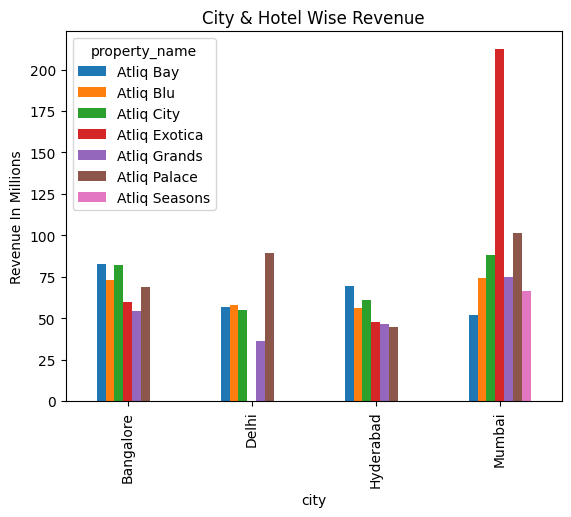

In [24]:

revenue_pivot.plot(kind='bar')
plt.ylabel('Revenue In Millions')
plt.title('City & Hotel Wise Revenue')

In [25]:
# Citywise Revenue In Millions
city_revenue=revenue_df.groupby(['city']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'Revenue in Millions'})
city_revenue['Revenue in Millions']=city_revenue['Revenue in Millions']/1000000
city_revenue['Revenue in Millions']=city_revenue['Revenue in Millions'].round(2)
city_revenue.sort_values(by='Revenue in Millions',ascending=False)

,Revenue in Millions
city,
Mumbai,668.64
Bangalore,420.40
Hyderabad,325.23
Delhi,294.50


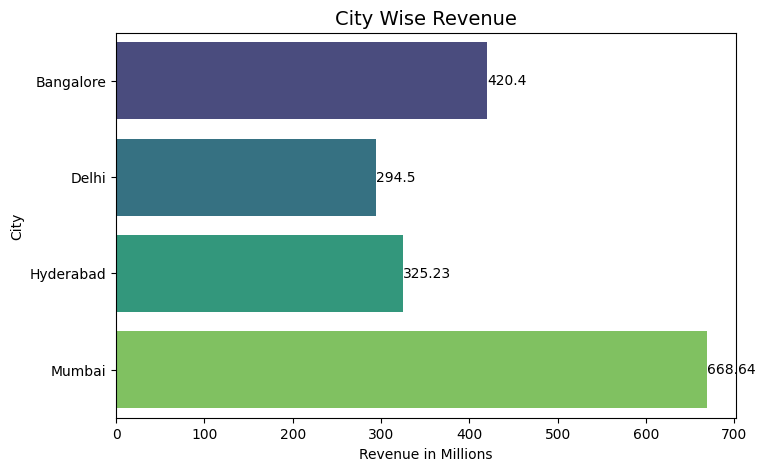

In [26]:

plt.figure(figsize=(8,5))

# Horizontal barplot (x = revenue, y = city)
ax = sns.barplot(
    x='Revenue in Millions',
    y='city',
    data=city_revenue,
    hue="city",
    palette="viridis"
)

# Title and labels
plt.title("City Wise Revenue", fontsize=14)
plt.xlabel("Revenue in Millions")
plt.ylabel("City")

# Loop to annotate values on bars
for index, value in enumerate(city_revenue['Revenue in Millions']):
    ax.text(value + 0.2, index, str(value), va='center')  

plt.show()


In [27]:
revenue_tr=pd.merge(dim_date,revenue_df,how='left',left_on='date',right_on='check_in_date')
revenue_trend=revenue_tr.groupby(['week no','property_name']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'Revenue in Millions'})
revenue_trend['Revenue in Millions']=revenue_trend['Revenue in Millions']/1000000
revenue_trend['Revenue in Millions']=revenue_trend['Revenue in Millions'].round(2)
revenue_trend.reset_index(inplace=True)
revenue_trend

,week no,property_name,Revenue in Millions
0,W 19,Atliq Bay,9.38
1,W 19,Atliq Blu,9.07
2,W 19,Atliq City,10.07
3,W 19,Atliq Exotica,11.58
4,W 19,Atliq Grands,7.60
...,...,...,...
86,W 31,Atliq City,19.19
87,W 31,Atliq Exotica,21.46
88,W 31,Atliq Grands,14.09
89,W 31,Atliq Palace,20.52


In [28]:
# Weekly Hotelwise Revenue Trend
pivot_data=revenue_trend.pivot(index='week no',columns='property_name',values='Revenue in Millions')
pivot_data

property_name,Atliq Bay,Atliq Blu,Atliq City,Atliq Exotica,Atliq Grands,Atliq Palace,Atliq Seasons
week no,,,,,,,
W 19,9.38,9.07,10.07,11.58,7.60,10.92,2.33
W 20,6.57,6.58,7.12,7.90,5.40,7.84,1.70
W 21,17.58,17.76,19.56,20.68,14.28,20.52,4.55
W 22,20.83,21.11,23.26,26.22,17.25,24.71,5.35
W 23,7.48,7.62,8.20,9.89,6.46,9.14,1.88
W 24,8.08,8.16,8.84,9.78,6.57,9.42,2.05
W 25,17.26,17.37,19.13,21.05,13.77,20.47,4.48
W 26,17.43,17.49,19.09,21.30,14.23,20.03,4.58
W 27,14.99,14.64,16.01,18.14,11.57,17.49,3.79


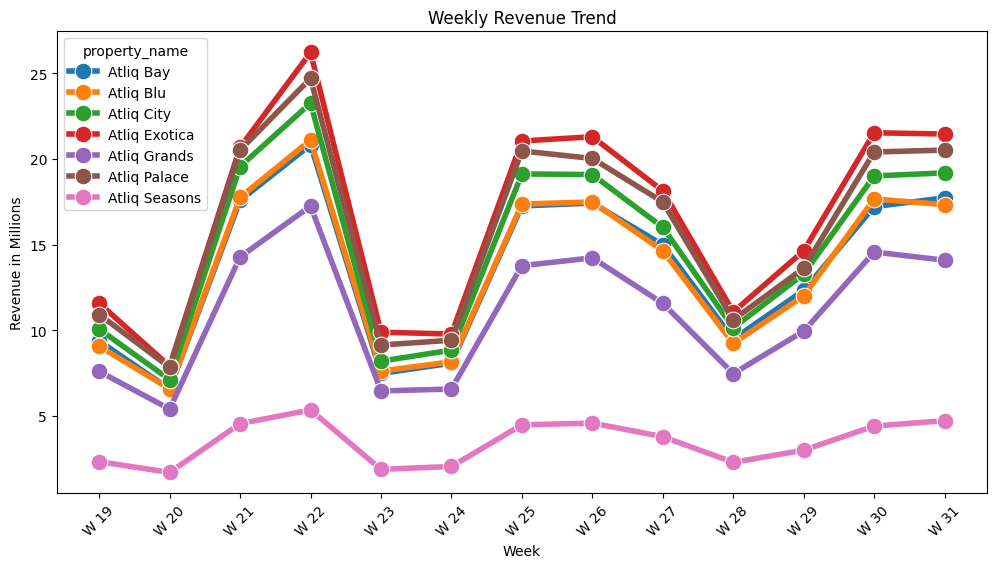

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=pivot_data,  
    marker='o', 
    markersize=12 ,                 
    linewidth=4,   
     dashes=False                        
)

plt.ylabel('Revenue in Millions')
plt.xlabel('Week')
plt.title('Weekly Revenue Trend')
plt.xticks(rotation=45)  
plt.show()

In [30]:
# Week over Week Revenue Trend
atliq_revenue_trend=revenue_tr.groupby(['week no']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'Revenue in Millions'})
atliq_revenue_trend['Revenue in Millions']=atliq_revenue_trend['Revenue in Millions']/1000000
atliq_revenue_trend['Revenue in Millions']=atliq_revenue_trend['Revenue in Millions'].round(2)
atliq_revenue_trend['Prev week Revenue']=atliq_revenue_trend['Revenue in Millions'].shift(1)
atliq_revenue_trend['Change Percentage']=((atliq_revenue_trend['Revenue in Millions']/atliq_revenue_trend['Prev week Revenue'])-1)*100
atliq_revenue_trend

,Revenue in Millions,Prev week Revenue,Change Percentage
week no,,,
W 19,60.96,NaN,NaN
W 20,43.10,60.96,-29.297900
W 21,114.92,43.10,166.635731
W 22,138.72,114.92,20.710059
W 23,50.67,138.72,-63.473183
W 24,52.90,50.67,4.401026
W 25,113.51,52.90,114.574669
W 26,114.15,113.51,0.563827
W 27,96.63,114.15,-15.348226


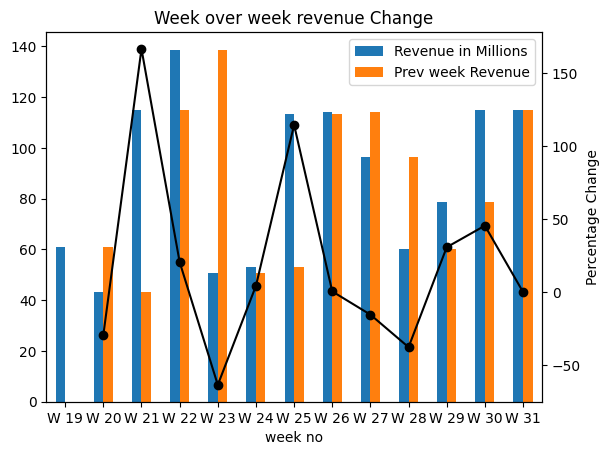

In [31]:
atliq_revenue_trend[['Revenue in Millions','Prev week Revenue']].plot(kind='bar')
atliq_revenue_trend['Change Percentage'].plot(secondary_y=True,color='black',marker='o')
plt.ylabel('Percentage Change')
plt.title('Week over week revenue Change')
plt.show()

## Booking analysis

In [32]:
# Hotelwise Bookings
hotel_bookings=revenue_df.groupby(['property_name','city']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Total bookings'})
hotel_bookings.reset_index(inplace=True)
hotel_bookings

,property_name,city,Total bookings
0,Atliq Bay,Bangalore,5812
1,Atliq Bay,Delhi,4820
2,Atliq Bay,Hyderabad,7333
3,Atliq Bay,Mumbai,3424
4,Atliq Blu,Bangalore,5736
5,Atliq Blu,Delhi,4418
6,Atliq Blu,Hyderabad,6458
7,Atliq Blu,Mumbai,5183
8,Atliq City,Bangalore,5979
9,Atliq City,Delhi,4693


In [33]:
booking_pivot=hotel_bookings.pivot(index='city',columns='property_name',values='Total bookings')
booking_pivot

property_name,Atliq Bay,Atliq Blu,Atliq City,Atliq Exotica,Atliq Grands,Atliq Palace,Atliq Seasons
city,,,,,,,
Bangalore,5812.0,5736.0,5979.0,4705.0,4371.0,5413.0,NaN
Delhi,4820.0,4418.0,4693.0,NaN,3153.0,7147.0,NaN
Hyderabad,7333.0,6458.0,6638.0,5256.0,4475.0,4728.0,NaN
Mumbai,3424.0,5183.0,6013.0,13480.0,5036.0,6337.0,3982.0


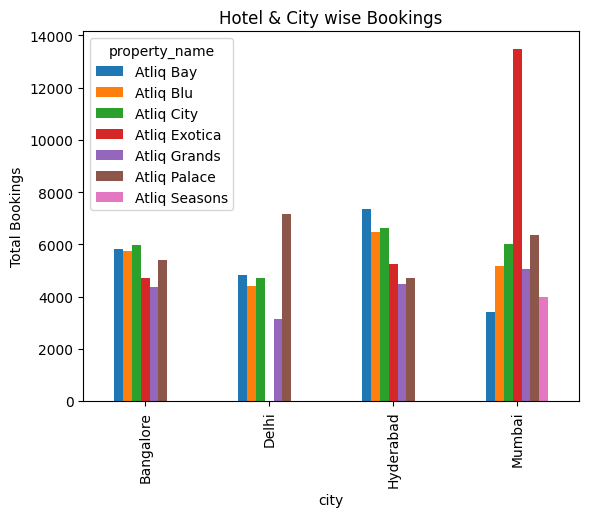

In [34]:
booking_pivot.plot(kind='bar')
plt.ylabel('Total Bookings')
plt.title('Hotel & City wise Bookings')
plt.show()

In [35]:
# Hotelwise cancellation percentage, No Show Percentage, Check out percentage
df1=revenue_df.groupby(['property_name','booking_status']).agg({'booking_id':'nunique'}).reset_index().pivot(index='property_name',columns='booking_status',values='booking_id')
df2=revenue_df.groupby(['property_name']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Toatal Bookings'})
df3=pd.merge(df1,df2,how='inner',on='property_name')
df3

,Cancelled,Checked Out,No Show,Toatal Bookings
property_name,,,,
Atliq Bay,5314,14965,1110,21389
Atliq Blu,5373,15267,1155,21795
Atliq City,5811,16365,1147,23323
Atliq Exotica,5713,16557,1171,23441
Atliq Grands,4273,11914,848,17035
Atliq Palace,5949,16532,1144,23625
Atliq Seasons,987,2811,184,3982


In [36]:
df3['Cancellation Percentage']=df3['Cancelled']*100/df3['Toatal Bookings']
df3['Checked Out Percentage']=df3['Checked Out']*100/df3['Toatal Bookings']
df3['No Show Percentage']=df3['No Show']*100/df3['Toatal Bookings']
df4=df3[['Checked Out Percentage','Cancellation Percentage','No Show Percentage']]
df4

,Checked Out Percentage,Cancellation Percentage,No Show Percentage
property_name,,,
Atliq Bay,69.965870,24.844546,5.189583
Atliq Blu,70.048176,24.652443,5.299381
Atliq City,70.166788,24.915320,4.917892
Atliq Exotica,70.632652,24.371827,4.995521
Atliq Grands,69.938362,25.083651,4.977986
Atliq Palace,69.976720,25.180952,4.842328
Atliq Seasons,70.592667,24.786539,4.620794


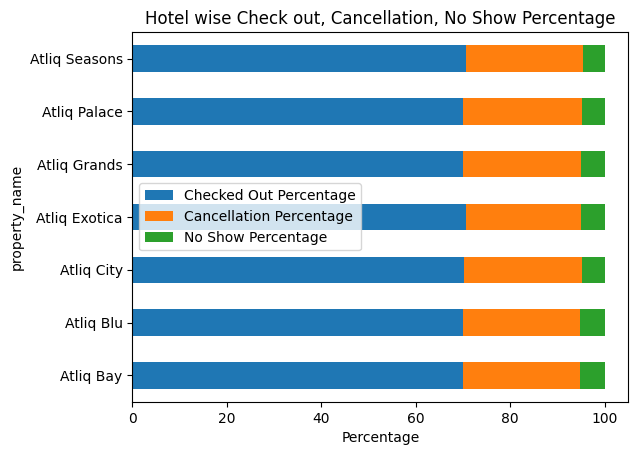

In [37]:
df4.plot(kind='barh',stacked=True)
plt.xlabel('Percentage')
plt.title('Hotel wise Check out, Cancellation, No Show Percentage')
plt.show()

In [38]:
# booking platform wise
platform_df=revenue_df.groupby(['booking_platform']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Total Bookings'})
platform_df.sort_values(by='Total Bookings',ascending=False)

,Total Bookings
booking_platform,
others,55066
makeyourtrip,26898
logtrip,14756
direct online,13379
tripster,9630
journey,8106
direct offline,6755


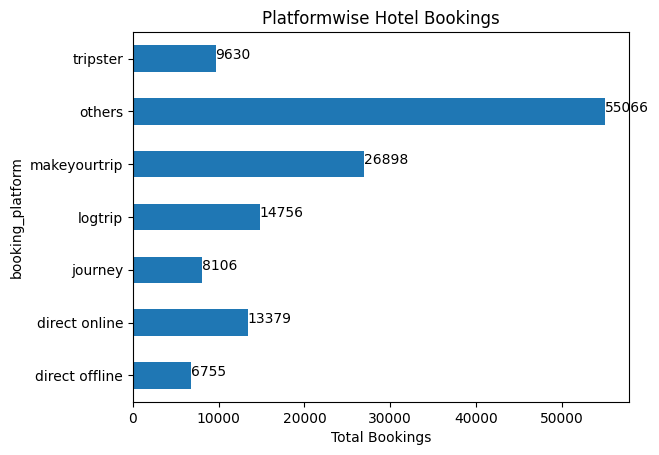

In [39]:
ax=platform_df.plot(kind='barh',legend=False)
plt.xlabel('Total Bookings')
plt.title('Platformwise Hotel Bookings')
for index, value in enumerate(platform_df['Total Bookings']):
    ax.text(value, index, str(value))
plt.show()

In [40]:
rooms_df=pd.merge(dim_rooms,fact_bookings,how='left',left_on='room_id',right_on='room_category')
rooms_df.head()

,room_id,room_class,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,RT1,Standard,May012216558RT11,16558,2022-04-27,2022-01-05,2022-02-05,-3,RT1,direct online,1.0,Checked Out,10010,10010
1,RT1,Standard,May012216558RT12,16558,2022-04-30,2022-01-05,2022-02-05,2,RT1,others,0.0,Cancelled,9100,3640
2,RT1,Standard,May012216558RT13,16558,2022-04-28,2022-01-05,2022-04-05,2,RT1,logtrip,5.0,Checked Out,9100000,9100
3,RT1,Standard,May012216558RT14,16558,2022-04-28,2022-01-05,2022-02-05,-2,RT1,others,0.0,Cancelled,9100,3640
4,RT1,Standard,May012216558RT15,16558,2022-04-27,2022-01-05,2022-02-05,4,RT1,direct online,5.0,Checked Out,10920,10920


In [41]:
# Room Categorywise Bookings
room_bookings=rooms_df.groupby(['room_class']).agg({'booking_id':'nunique'})
room_bookings['Percentage']=room_bookings['booking_id']*100/room_bookings['booking_id'].sum()
room_bookings['Percentage']=room_bookings['Percentage'].round(2)
room_bookings

,booking_id,Percentage
room_class,,
Elite,49505,36.78
Premium,30566,22.71
Presidential,16073,11.94
Standard,38446,28.57


array([<Axes: ylabel='Percentage'>], dtype=object)

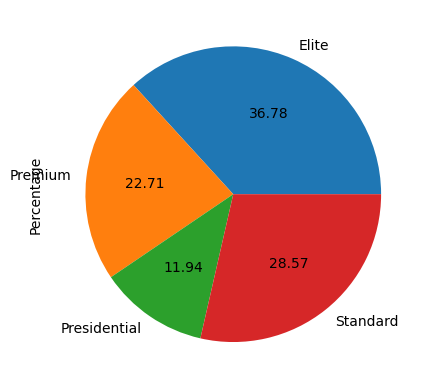

In [42]:
# Room Caegory wise Booking Percentage
room_bookings['Percentage'].plot(kind='pie',subplots=True,autopct='%0.2f')

In [43]:
# Booking Trends weekly
weekly_bookings=revenue_tr.groupby(['week no','property_name']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Total Bookings'})
weekly_bookings.reset_index(inplace=True)
weekly_bookings_pivot=weekly_bookings.pivot(index='week no',columns='property_name',values='Total Bookings')
weekly_bookings_pivot

property_name,Atliq Bay,Atliq Blu,Atliq City,Atliq Exotica,Atliq Grands,Atliq Palace,Atliq Seasons
week no,,,,,,,
W 19,770,770,823,842,604,856,143
W 20,534,555,583,578,430,591,102
W 21,1441,1465,1586,1546,1134,1600,270
W 22,1726,1754,1896,1913,1389,1933,323
W 23,624,645,685,710,514,689,116
W 24,675,684,723,732,536,721,123
W 25,1415,1459,1550,1556,1129,1573,269
W 26,1424,1459,1568,1574,1141,1581,270
W 27,1210,1225,1294,1319,958,1347,223


Text(0.5, 1.0, 'Weekly Hotel Bookings')

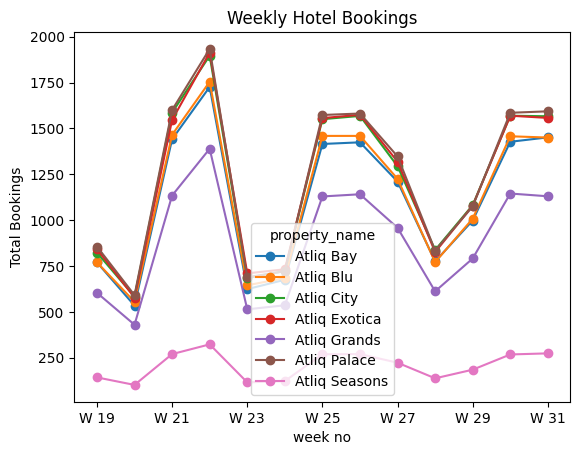

In [44]:
weekly_bookings_pivot.plot(kind='line',marker='o')
plt.ylabel('Total Bookings')
plt.title('Weekly Hotel Bookings')

In [45]:
x=revenue_tr.groupby(['week no','booking_status']).agg({'booking_id':'nunique'})
x.reset_index(inplace=True)
x

,week no,booking_status,booking_id
0,W 19,Cancelled,1203
1,W 19,Checked Out,3364
2,W 19,No Show,241
3,W 20,Cancelled,816
4,W 20,Checked Out,2408
5,W 20,No Show,149
6,W 21,Cancelled,2226
7,W 21,Checked Out,6331
8,W 21,No Show,485
9,W 22,Cancelled,2772


In [46]:
y=revenue_tr.groupby(['week no']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Total Bookings'})
y.reset_index(inplace=True)
y

,week no,Total Bookings
0,W 19,4808
1,W 20,3373
2,W 21,9042
3,W 22,10934
4,W 23,3983
5,W 24,4194
6,W 25,8951
7,W 26,9017
8,W 27,7576
9,W 28,4793


In [47]:
x1=x.pivot(index='week no',columns='booking_status',values='booking_id')
hotel_booking=pd.merge(x1,y,on='week no')
hotel_booking

,week no,Cancelled,Checked Out,No Show,Total Bookings
0,W 19,1203,3364,241,4808
1,W 20,816,2408,149,3373
2,W 21,2226,6331,485,9042
3,W 22,2772,7585,577,10934
4,W 23,959,2794,230,3983
5,W 24,1039,2960,195,4194
6,W 25,2250,6263,438,8951
7,W 26,2299,6292,426,9017
8,W 27,1853,5359,364,7576
9,W 28,1238,3306,249,4793


In [48]:
hotel_booking['Cancellation Percentage']=hotel_booking['Cancelled']*100/hotel_booking['Total Bookings']
hotel_booking['Checked Out Percentage']=hotel_booking['Checked Out']*100/hotel_booking['Total Bookings']
hotel_booking['No Show Percentage']=hotel_booking['No Show']*100/hotel_booking['Total Bookings']
booking_status_trend=hotel_booking[['week no','Checked Out Percentage','Cancellation Percentage','No Show Percentage']]
booking_status_trend

,week no,Checked Out Percentage,Cancellation Percentage,No Show Percentage
0,W 19,69.966722,25.020799,5.012479
1,W 20,71.390454,24.192114,4.417433
2,W 21,70.017695,24.618447,5.363858
3,W 22,69.370770,25.352113,5.277117
4,W 23,70.148130,24.077329,5.774542
5,W 24,70.577015,24.773486,4.649499
6,W 25,69.969836,25.136856,4.893308
7,W 26,69.779306,25.496285,4.724409
8,W 27,70.736536,24.458817,4.804646
9,W 28,68.975589,25.829334,5.195076


Text(0.5, 1.0, 'Weekly Booking Status')

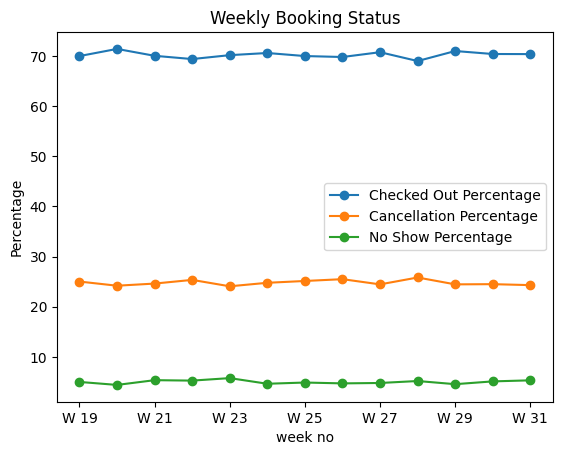

In [49]:
x1=booking_status_trend.set_index('week no')
x1.plot(kind='line',marker='o')
plt.ylabel('Percentage')
plt.title('Weekly Booking Status')

## Occupancy analysis

In [50]:
fact_aggregate.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30
1,19562,2022-05-01,RT1,28,30
2,19563,2022-05-01,RT1,23,30
3,17558,2022-05-01,RT1,30,19
4,16558,2022-05-01,RT1,18,19


In [51]:
oc=pd.merge(dim_hotels,fact_aggregate,how='left',on='property_id')
occ_df=pd.merge(dim_date,oc,how='left',left_on='date',right_on='check_in_date')
occ_df

,date,mmm yy,week no,day_type,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity
0,2022-05-01,May 22,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT1,18,19
1,2022-05-01,May 22,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT2,21,22
2,2022-05-01,May 22,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT3,8,8
3,2022-05-01,May 22,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT4,3,3
4,2022-05-01,May 22,W 19,weekend,16559,Atliq Exotica,Luxury,Mumbai,2022-05-01,RT1,25,30
...,...,...,...,...,...,...,...,...,...,...,...,...
9095,2022-07-30,Jul 22,W 31,weekend,19563,Atliq Palace,Business,Bangalore,2022-07-30,RT4,4,6
9096,2022-07-30,Jul 22,W 31,weekend,17564,Atliq Seasons,Business,Mumbai,2022-07-30,RT1,9,16
9097,2022-07-30,Jul 22,W 31,weekend,17564,Atliq Seasons,Business,Mumbai,2022-07-30,RT2,19,40
9098,2022-07-30,Jul 22,W 31,weekend,17564,Atliq Seasons,Business,Mumbai,2022-07-30,RT3,12,24


In [52]:
# Hotelwise Occupancy
hotel_occ=occ_df.groupby(['city','property_name']).agg({'successful_bookings':'sum','capacity':'sum'})
hotel_occ['Occupancy']=hotel_occ['successful_bookings']*100/hotel_occ['capacity']
hotel_occ.reset_index(inplace=True)
hotel_occ

,city,property_name,successful_bookings,capacity,Occupancy
0,Bangalore,Atliq Bay,5736,8736,65.659341
1,Bangalore,Atliq Blu,5669,10647,53.245046
2,Bangalore,Atliq City,6004,9009,66.644467
3,Bangalore,Atliq Exotica,4669,8645,54.008097
4,Bangalore,Atliq Grands,4345,9737,44.623601
5,Bangalore,Atliq Palace,5347,10010,53.416583
6,Delhi,Atliq Bay,4762,8918,53.397623
7,Delhi,Atliq Blu,4362,6643,65.663104
8,Delhi,Atliq City,4635,8645,53.614806
9,Delhi,Atliq Grands,3114,4732,65.807270


Text(0.5, 1.0, 'City & Hotel wise Occupancy')

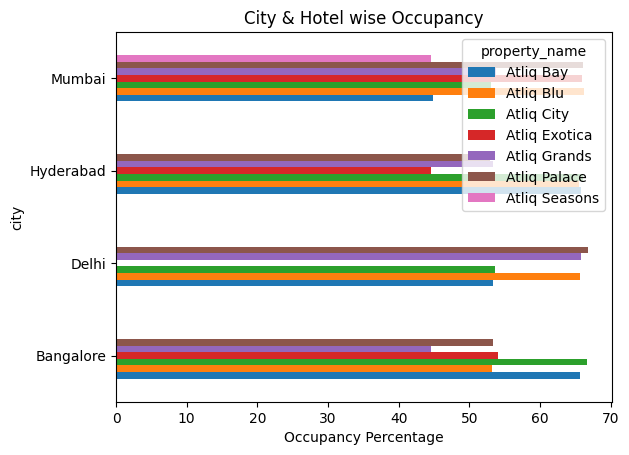

In [53]:
hotel_occ_pivot=hotel_occ.pivot(index='city',columns='property_name',values='Occupancy')
hotel_occ_pivot.plot(kind='barh')
plt.xlabel('Occupancy Percentage')
plt.title('City & Hotel wise Occupancy')

In [54]:
# Room Class wise Occupancy
room_occ=pd.merge(dim_rooms,occ_df,how='left',left_on='room_id',right_on='room_category')
room_occ_df=room_occ.groupby(['room_class']).agg({'successful_bookings':'sum','capacity':'sum'})
room_occ_df['Occupancy']=room_occ_df['successful_bookings']*100/room_occ_df['capacity']
room_occ_df['Occupancy']=room_occ_df['Occupancy'].round(2)
room_occ_df

,successful_bookings,capacity,Occupancy
room_class,,,
Elite,48945,84994,57.59
Premium,30186,52507,57.49
Presidential,15876,26845,59.14
Standard,38166,65706,58.09


In [55]:
room_df=room_occ_df[['Occupancy']]
room_df=room_df.sort_values(by='Occupancy')
room_df

,Occupancy
room_class,
Premium,57.49
Elite,57.59
Standard,58.09
Presidential,59.14


Text(0.5, 1.0, 'Room Class Wise Occupancy')

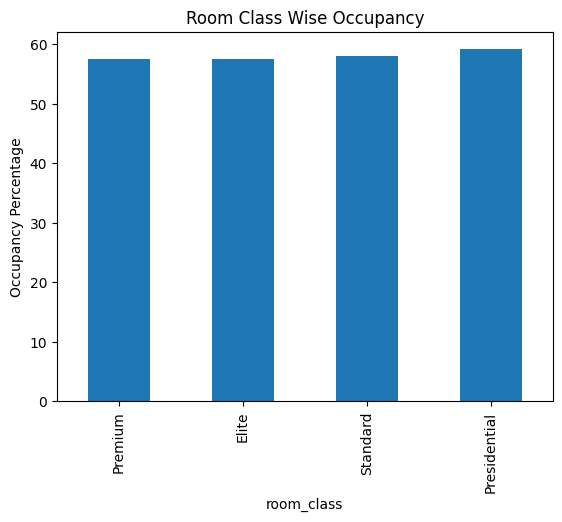

In [56]:
ax=room_df.plot(kind='bar',legend=False)
plt.ylabel('Occupancy Percentage')
plt.title('Room Class Wise Occupancy')

In [57]:
# Daywise Occupancy
occ_df['Day Name']=occ_df['date'].dt.day_name()
occ_df['Day No']=occ_df['date'].dt.dayofweek
day_occ=occ_df.groupby(['Day Name','Day No','property_name']).agg({'successful_bookings':'sum','capacity':'sum'})
day_occ['Occupancy']=day_occ['successful_bookings']*100/day_occ['capacity']
day_occx=day_occ[['Occupancy']]
z=day_occx.reset_index()
z.sort_values(by='Day No')


,Day Name,Day No,property_name,Occupancy
7,Monday,0,Atliq Bay,51.816776
10,Monday,0,Atliq Exotica,51.477960
13,Monday,0,Atliq Seasons,38.620143
12,Monday,0,Atliq Palace,53.324946
11,Monday,0,Atliq Grands,46.590909
8,Monday,0,Atliq Blu,55.618204
9,Monday,0,Atliq City,52.690502
35,Tuesday,1,Atliq Bay,52.010050
36,Tuesday,1,Atliq Blu,54.409988
41,Tuesday,1,Atliq Seasons,38.937351


<function matplotlib.pyplot.show(close=None, block=None)>

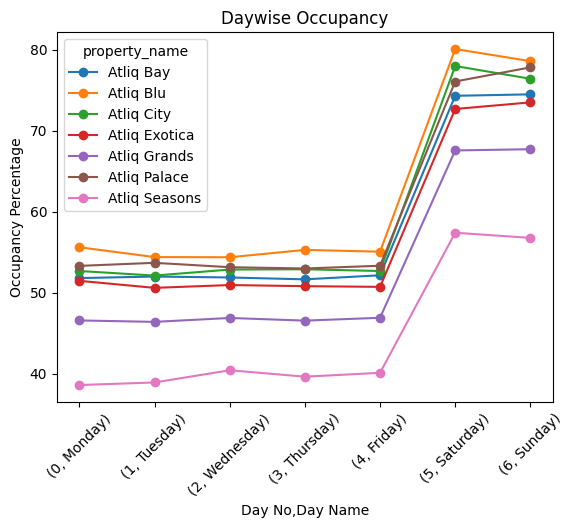

In [58]:
z_pivot=z.pivot(index=['Day No','Day Name'],columns='property_name',values='Occupancy')
z_pivot.plot(kind='line',marker='o')
plt.ylabel('Occupancy Percentage')
plt.title('Daywise Occupancy')
plt.xticks(rotation=45)
plt.show

In [59]:
weekly_occ=occ_df.groupby(['week no','property_name']).agg({'successful_bookings':'sum','capacity':'sum'})
weekly_occx=weekly_occ.reset_index()
weekly_occx['Occupancy']=weekly_occx['successful_bookings']*100/weekly_occx['capacity']
weekly_occx

,week no,property_name,successful_bookings,capacity,Occupancy
0,W 19,Atliq Bay,1745,2791,62.522393
1,W 19,Atliq Blu,1771,2673,66.255144
2,W 19,Atliq City,1897,2982,63.615023
3,W 19,Atliq Exotica,1907,3115,61.219904
4,W 19,Atliq Grands,1428,2464,57.954545
...,...,...,...,...,...
86,W 31,Atliq City,1566,2982,52.515091
87,W 31,Atliq Exotica,1581,3115,50.754414
88,W 31,Atliq Grands,1130,2464,45.860390
89,W 31,Atliq Palace,1593,2996,53.170895


Text(0.5, 1.0, 'Weekly Occupancy Trend')

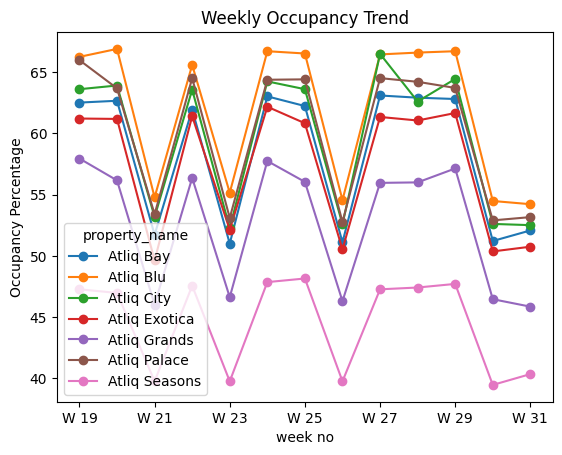

In [60]:
weekly_occx_pivot=weekly_occx.pivot(index='week no',columns='property_name',values='Occupancy')
weekly_occx_pivot.plot(kind='line',marker='o')
plt.ylabel('Occupancy Percentage')
plt.title('Weekly Occupancy Trend')

## ADR (Average Daily Rate) Analysis

In [61]:
adr=revenue_tr.groupby(['property_name']).agg({'booking_id':'nunique','revenue_realized':'sum'})
adr

,booking_id,revenue_realized
property_name,,
Atliq Bay,14470,176333547.0
Atliq Blu,14702,176046104.0
Atliq City,15762,192904369.0
Atliq Exotica,15801,215230689.0
Atliq Grands,11513,143234579.0
Atliq Palace,15978,205684742.0
Atliq Seasons,2704,45128251.0


In [62]:
adr['ADR']=adr['revenue_realized']/adr['booking_id']
adr['ADR']=adr['ADR'].round(0)
adrx=adr[['ADR']]
adry=adrx.sort_values(by='ADR')
adry


,ADR
property_name,
Atliq Blu,11974.0
Atliq Bay,12186.0
Atliq City,12239.0
Atliq Grands,12441.0
Atliq Palace,12873.0
Atliq Exotica,13621.0
Atliq Seasons,16689.0


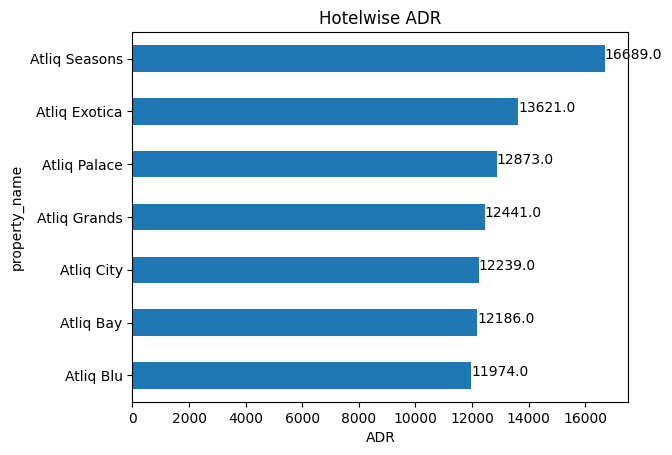

In [63]:
ax=adry.plot(kind='barh',legend=False)
plt.xlabel('ADR')
plt.title('Hotelwise ADR')
for index, value in enumerate(adry['ADR']):
    ax.text(value, index, str(value))
plt.show()

## DBRN, DSRN, DURN Analysis

In [64]:
min_date=dim_date['date'].min()
max_date=dim_date['date'].max()
no_of_days=(max_date-min_date)/np.timedelta64(1,'D')
no_of_days

90.0

In [66]:
#DBRN
DBRN=adr[['booking_id']]/no_of_days
DBRN['booking_id']=DBRN['booking_id'].round(0)
DBRNx=DBRN.sort_values(by='booking_id')
DBRNx

,booking_id
property_name,
Atliq Seasons,30.0
Atliq Grands,128.0
Atliq Bay,161.0
Atliq Blu,163.0
Atliq City,175.0
Atliq Exotica,176.0
Atliq Palace,178.0


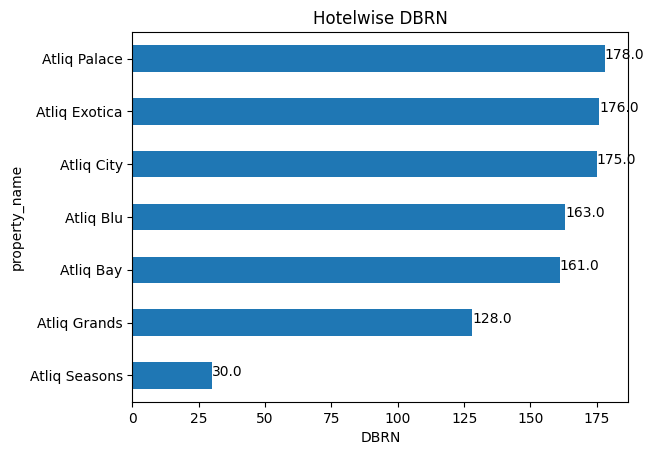

In [67]:
ax=DBRNx.plot(kind='barh',legend=False)
plt.xlabel('DBRN')
plt.title('Hotelwise DBRN')
for index, value in enumerate(DBRNx['booking_id']):
    ax.text(value, index, str(value))
plt.show()

In [68]:
#DSRN
hotel_capacity=pd.merge(dim_hotels,fact_aggregate,how='left',on='property_id').groupby(['property_name']).agg({'capacity':'sum'})
hotel_capacity['DSRN']=hotel_capacity/no_of_days
hotel_capacity['DSRN']=hotel_capacity['DSRN'].round(0)
hotel_capacity
hotel_capacityx=hotel_capacity.sort_values(by='DSRN')
hotel_capacityy=hotel_capacityx[['DSRN']]
hotel_capacityy

,DSRN
property_name,
Atliq Seasons,99.0
Atliq Grands,360.0
Atliq Blu,390.0
Atliq Bay,407.0
Atliq City,435.0
Atliq Palace,438.0
Atliq Exotica,455.0


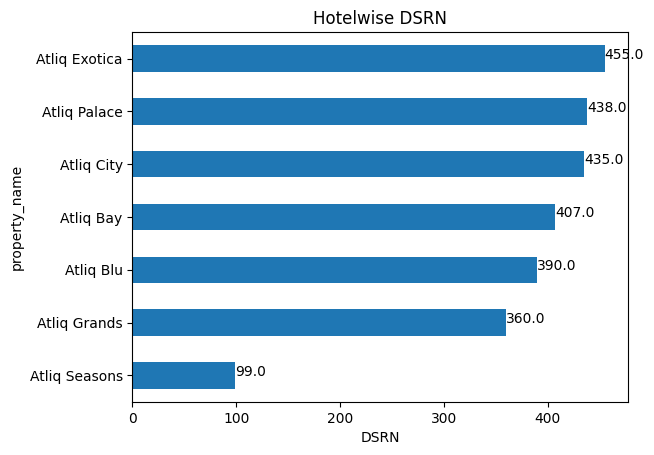

In [69]:
ax=hotel_capacityy.plot(kind='barh',legend=False)
plt.xlabel('DSRN')
plt.title('Hotelwise DSRN')
for index, value in enumerate(hotel_capacityy['DSRN']):
    ax.text(value, index, str(value))
plt.show()

In [71]:
# DURN
m=revenue_tr[revenue_tr['booking_status']=='Checked Out']
n=m.groupby(['property_name']).agg({'booking_id':'nunique'})
n['DURN']=n['booking_id']/no_of_days
n['DURN']=n['DURN'].round(0)
n1=n.sort_values(by='DURN')
n2=n1[['DURN']]
n2

,DURN
property_name,
Atliq Seasons,21.0
Atliq Grands,90.0
Atliq Bay,113.0
Atliq Blu,114.0
Atliq City,122.0
Atliq Exotica,124.0
Atliq Palace,124.0


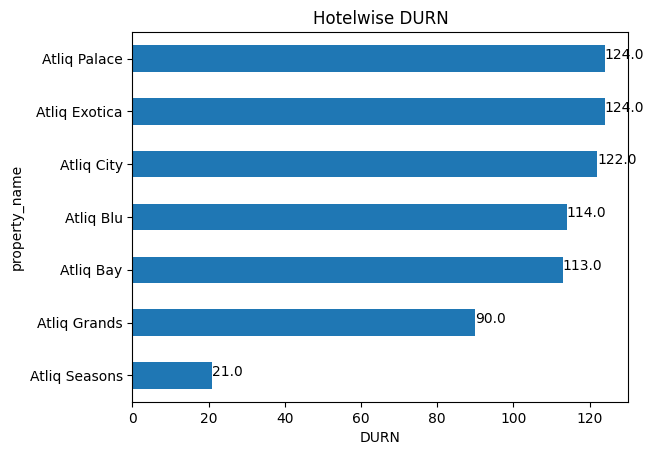

In [72]:
ax=n2.plot(kind='barh',legend=False)
plt.xlabel('DURN')
plt.title('Hotelwise DURN')
for index, value in enumerate(n2['DURN']):
    ax.text(value, index, str(value))
plt.show()
